<a href="https://colab.research.google.com/github/xHeput/random_excercises/blob/main/LotkaVolterra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

podaj początkową liczebność ofiar5
podaj początkową liczebność drapieżników4


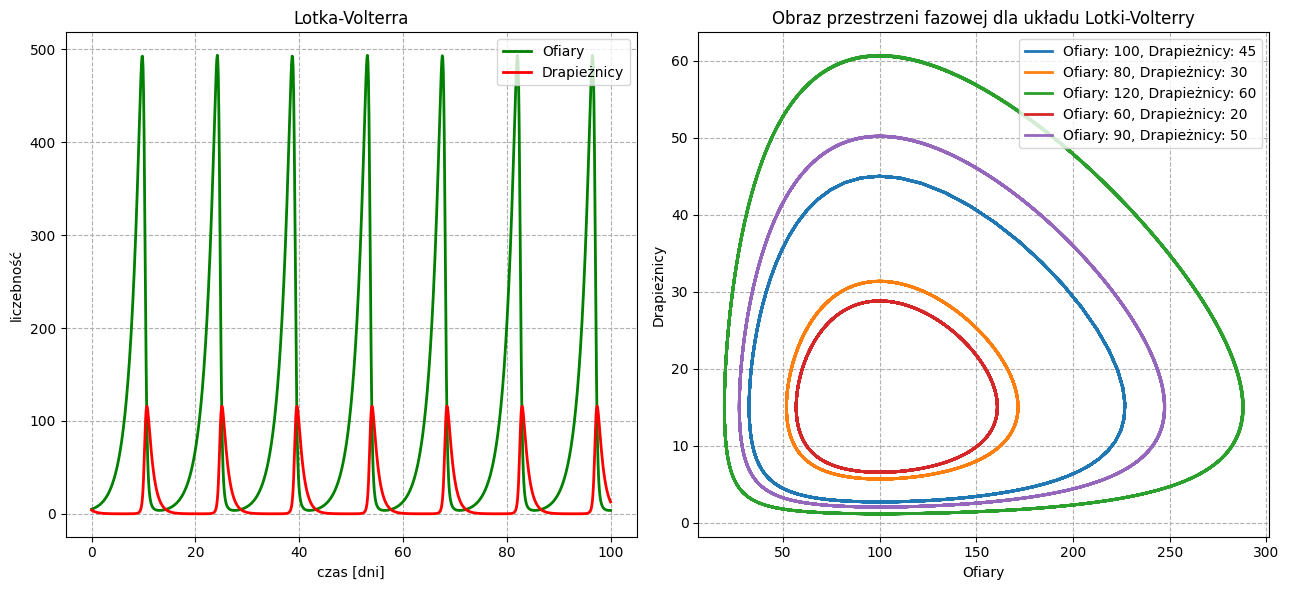

In [ ]:
import matplotlib.pyplot as pltt
import numpy as np
from scipy.integrate import odeint



O = input('podaj początkową liczebność ofiar')
D = input('podaj początkową liczebność drapieżników')
max_T = 'czas'  # czas, w którym badamy stosunek liczebności populacji ofiar i drapieżników



# Parametry
alfa = 0.5  # współczynnik przyrostu ofiar
beta = 0.0333  # częstośc umierania ofiar na skutek drapieżnictwa
delta = 1.0  # współczynnik przyrostu drapieżnictwa
gamma = 0.01  # współczynnik ubywania drapieżników
max_T = 100



def Lotka_Volterra(u, T, alfa, beta, delta, gamma):
    x, y = u
    dOdt = alfa * x - beta * x * y
    dDdt = -delta * y + gamma * x * y
    return (dOdt, dDdt)



T = np.linspace(0, max_T, 10 * max_T)



y0 = O, D
ret = odeint(Lotka_Volterra, y0, T, args = (alfa, beta, delta, gamma))
O, D = ret.T



Przedziały_wykresu_fazowego = [(100, 45),
                                (80, 30),
                                (120, 60),
                                (60, 20),
                                (90, 50),]

plt.figure(figsize=(13,6))

plt.subplot(1, 2, 1)

plots = plt.plot(T, O, 'g', lw=2, label = 'Ofiary') + plt. plot(T, D, 'r', lw=2, label = 'Drapieżnicy')

plt.title('Lotka-Volterra')

plt.xlabel('czas [dni]')

plt.ylabel('liczebność')

plt.grid(True, linestyle = '--')

plt.legend(loc = 'upper right')



# Wykres fazowy

plt.subplot(1, 2, 2)

for y0 in Przedziały_wykresu_fazowego:

    ret = odeint(Lotka_Volterra, y0, T, args=(alfa,beta,delta,gamma))

    O, D = ret.T

    plt.plot(O, D, lw=2, label=f'Ofiary: {y0[0]}, Drapieżnicy: {y0[1]}')

plt.title('Obraz przestrzeni fazowej dla układu Lotki-Volterry')

plt.xlabel('Ofiary')

plt.ylabel('Drapieżnicy')

plt.grid(True, linestyle='--')

plt.legend(loc='upper right')


plt.tight_layout()
plt.show()

Podaj początkową liczbę ofiar: 5
Podaj początkową liczbę drapieżników: 4


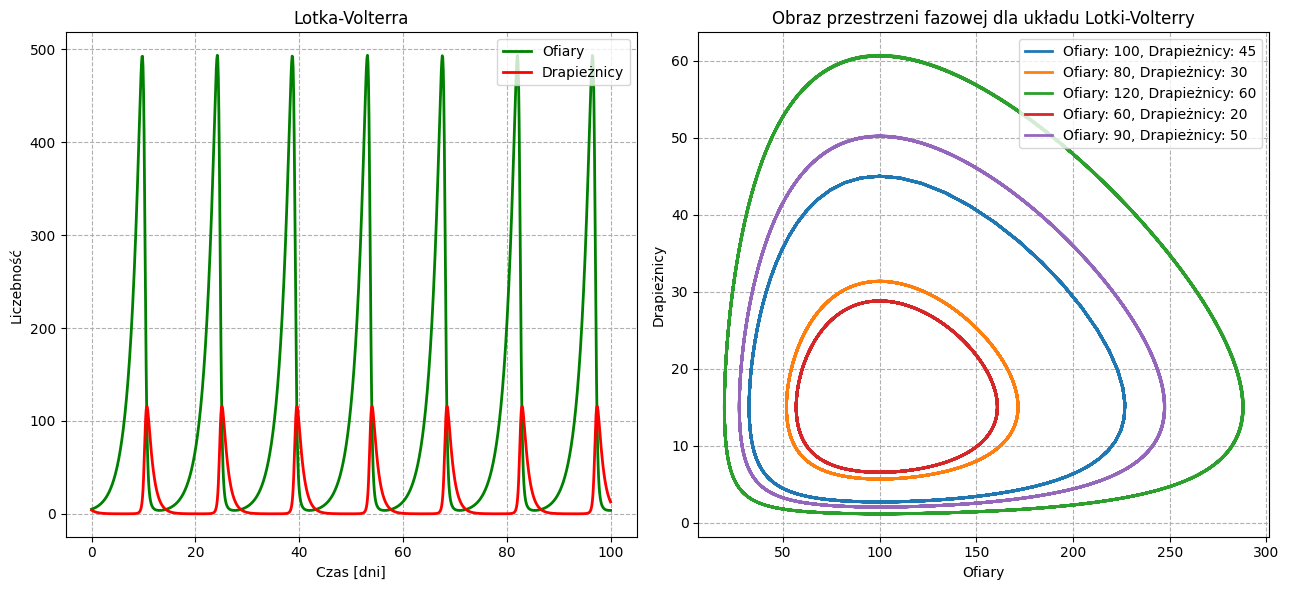

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Pobranie danych od użytkownika
O = int(input('Podaj początkową liczbę ofiar: '))
D = int(input('Podaj początkową liczbę drapieżników: '))

# Parametry
alfa = 0.5  # współczynnik przyrostu ofiar
beta = 0.0333  # częstość umierania ofiar na skutek drapieżnictwa
delta = 1.0  # współczynnik przyrostu drapieżników
gamma = 0.01  # współczynnik ubywania drapieżników
max_T = 100  # czas, w którym badamy stosunek liczebności populacji ofiar i drapieżników

# Definicja funkcji dla modelu Lotki-Volterra
def Lotka_Volterra(u, T, alfa, beta, delta, gamma):
    x, y = u
    dOdt = alfa * x - beta * x * y
    dDdt = -delta * y + gamma * x * y
    return [dOdt, dDdt]

# Zakres czasowy
T = np.linspace(0, max_T, 10 * max_T)

# Rozwiązanie układu równań różniczkowych
y0 = [O, D]
ret = odeint(Lotka_Volterra, y0, T, args=(alfa, beta, delta, gamma))

# Wizualizacja wyników
plt.figure(figsize=(13, 6))

# Wykres liczebności
plt.subplot(1, 2, 1)
plt.plot(T, ret[:, 0], 'g', lw=2, label='Ofiary')
plt.plot(T, ret[:, 1], 'r', lw=2, label='Drapieżnicy')
plt.title('Lotka-Volterra')
plt.xlabel('Czas [dni]')
plt.ylabel('Liczebność')
plt.grid(True, linestyle='--')
plt.legend(loc='upper right')

# Wykres fazowy
plt.subplot(1, 2, 2)
for y0 in [(100, 45), (80, 30), (120, 60), (60, 20), (90, 50)]:
    ret_phase = odeint(Lotka_Volterra, y0, T, args=(alfa, beta, delta, gamma))
    plt.plot(ret_phase[:, 0], ret_phase[:, 1], lw=2, label=f'Ofiary: {y0[0]}, Drapieżnicy: {y0[1]}')

plt.title('Obraz przestrzeni fazowej dla układu Lotki-Volterry')
plt.xlabel('Ofiary')
plt.ylabel('Drapieżnicy')
plt.grid(True, linestyle='--')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Podaj początkową liczebność ofiar: 5
Podaj początkową liczebność drapieżników: 4


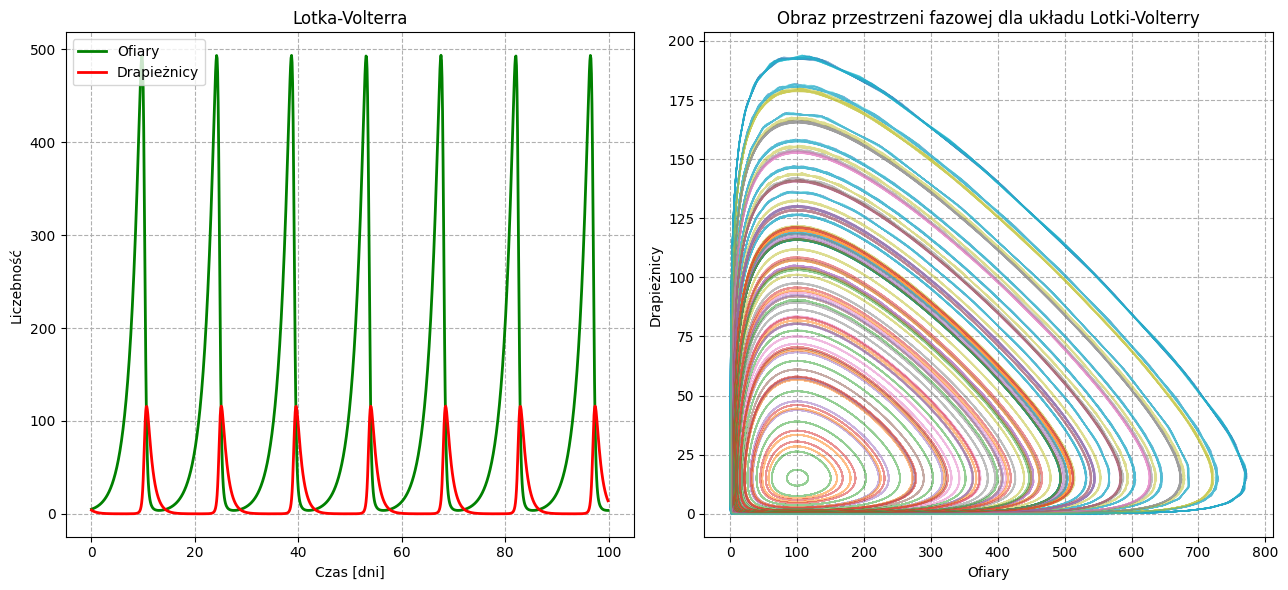

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Parametry modelu
ALFA = 0.5
BETA = 0.0333
DELTA = 1.0
GAMMA = 0.01
MAX_T = 100

def lotka_volterra(u, alfa, beta, delta, gamma):
    x, y = u
    dxdt = alfa * x - beta * x * y
    dydt = -delta * y + gamma * x * y
    return np.array([dxdt, dydt])

def rk4_step(f, u, t, dt, *args):
    k1 = f(u, *args)
    k2 = f(u + dt/2 * k1, *args)
    k3 = f(u + dt/2 * k2, *args)
    k4 = f(u + dt * k3, *args)
    return u + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

def solve_lotka_volterra(f, y0, T, dt, *args):
    num_steps = int(T / dt)
    u = np.zeros((num_steps, len(y0)))
    u[0] = y0
    for i in range(1, num_steps):
        u[i] = rk4_step(f, u[i-1], i*dt, dt, *args)
    return u

def get_initial_conditions():
    while True:
        try:
            ofiary = int(input('Podaj początkową liczebność ofiar: '))
            drapieznicy = int(input('Podaj początkową liczebność drapieżników: '))
            if ofiary > 0 and drapieznicy > 0:
                return ofiary, drapieznicy
            else:
                print("Liczby muszą być dodatnie.")
        except ValueError:
            print("Proszę podać poprawne liczby całkowite.")

def main():
    # Pobranie początkowych warunków
    y0 = get_initial_conditions()

    # Parametry czasu
    dt = 0.1
    T = np.arange(0, MAX_T, dt)

    # Rozwiązywanie równań różniczkowych
    ret = solve_lotka_volterra(lotka_volterra, y0, MAX_T, dt, ALFA, BETA, DELTA, GAMMA)
    O, D = ret[:, 0], ret[:, 1]

    # Rysowanie wykresów
    fig, axs = plt.subplots(1, 2, figsize=(13, 6))

    # Wykres liczebności w czasie
    axs[0].plot(T, O, 'g', lw=2, label='Ofiary')
    axs[0].plot(T, D, 'r', lw=2, label='Drapieżnicy')
    axs[0].set_title('Lotka-Volterra')
    axs[0].set_xlabel('Czas [dni]')
    axs[0].set_ylabel('Liczebność')
    axs[0].grid(True, linestyle='--')
    axs[0].legend(loc='best')

    # Wykres fazowy
    O_grid, D_grid = np.meshgrid(np.linspace(min(O), max(O), 10), np.linspace(min(D), max(D), 10))
    for O0, D0 in zip(O_grid.flatten(), D_grid.flatten()):
        ret = solve_lotka_volterra(lotka_volterra, (O0, D0), MAX_T, dt, ALFA, BETA, DELTA, GAMMA)
        axs[1].plot(ret[:, 0], ret[:, 1], lw=1, alpha=0.5)
    axs[1].set_title('Obraz przestrzeni fazowej dla układu Lotki-Volterry')
    axs[1].set_xlabel('Ofiary')
    axs[1].set_ylabel('Drapieżnicy')
    axs[1].grid(True, linestyle='--')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


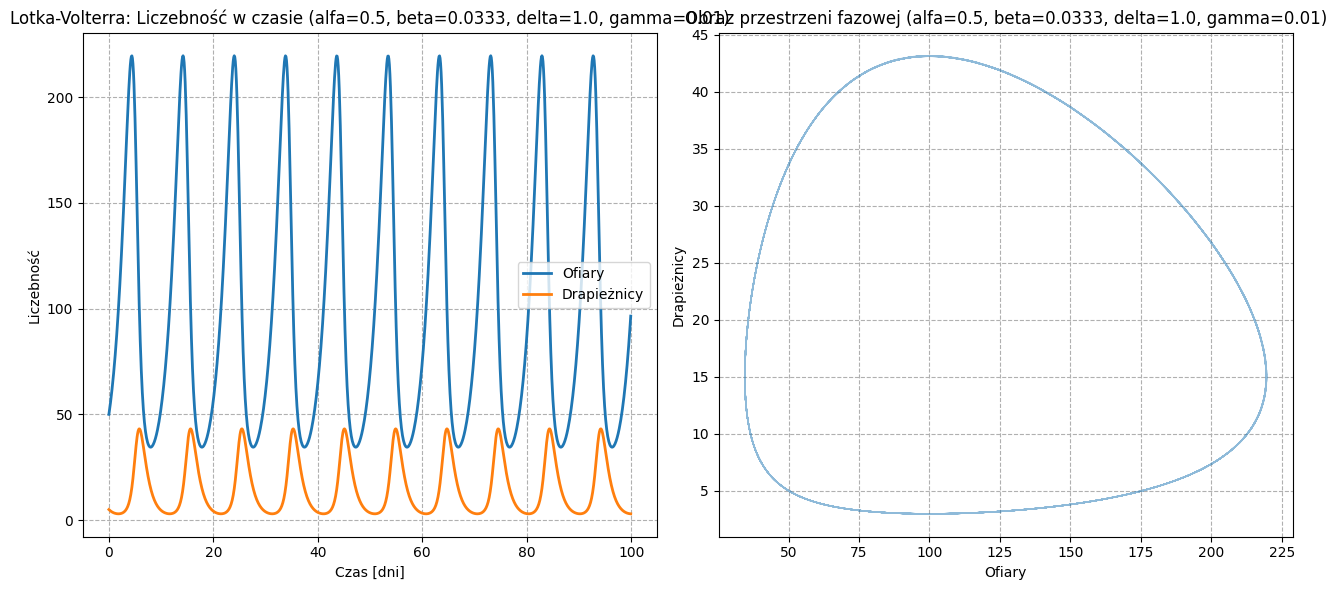

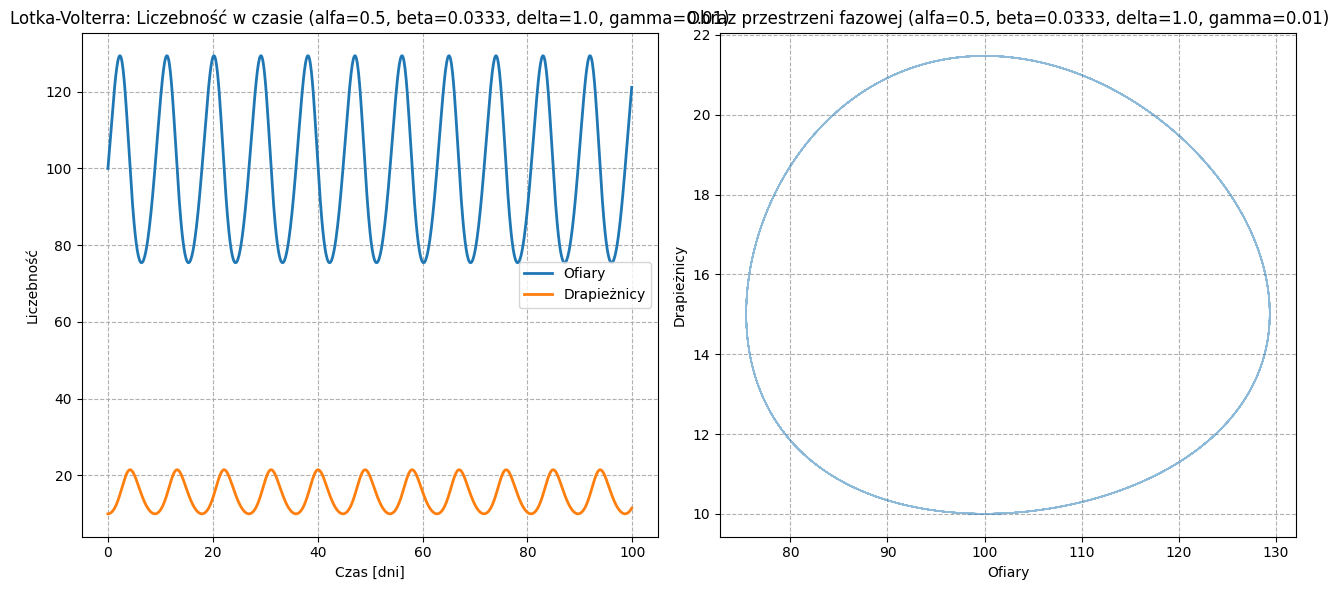

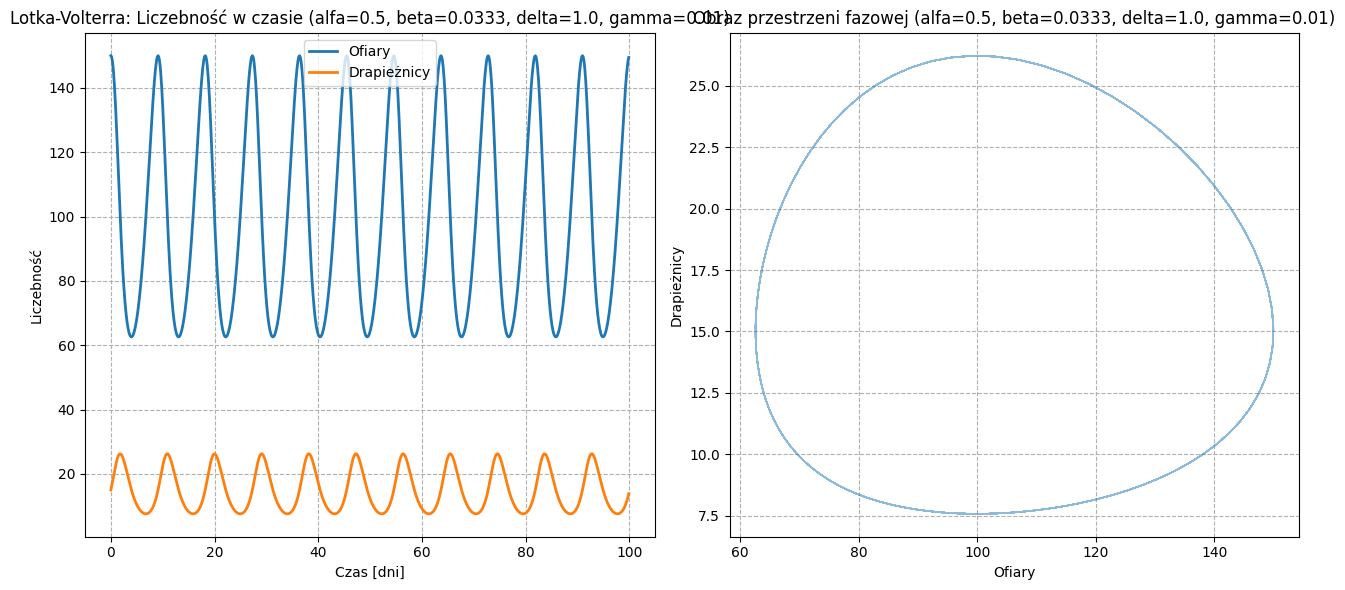

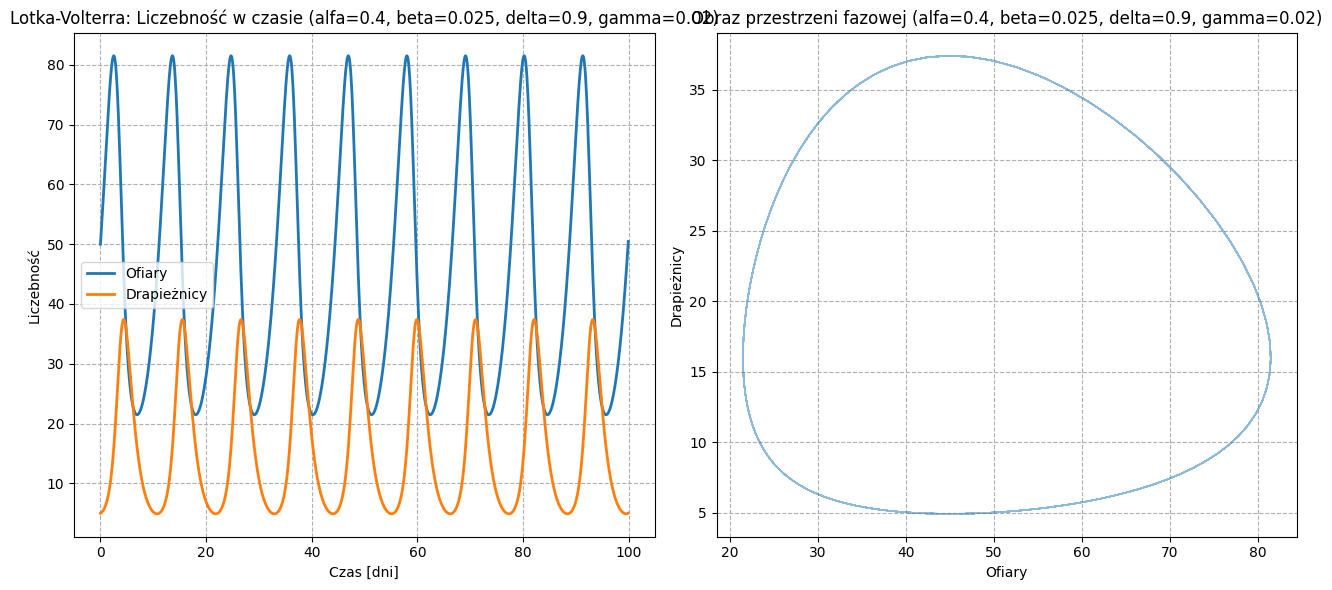

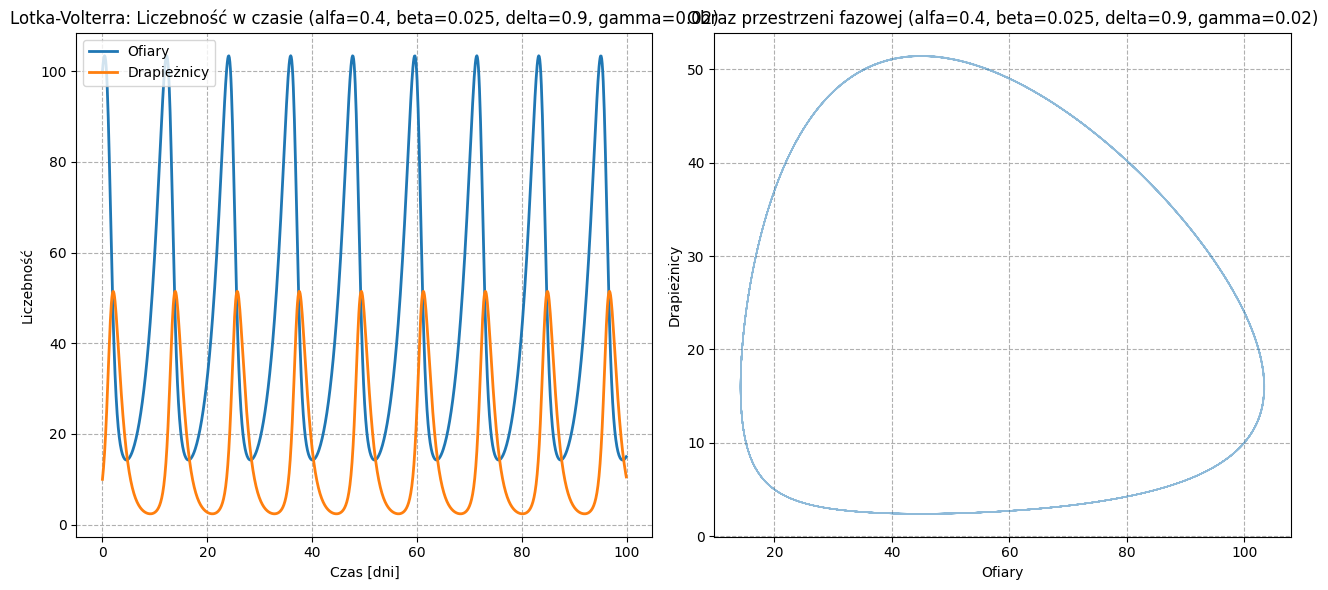

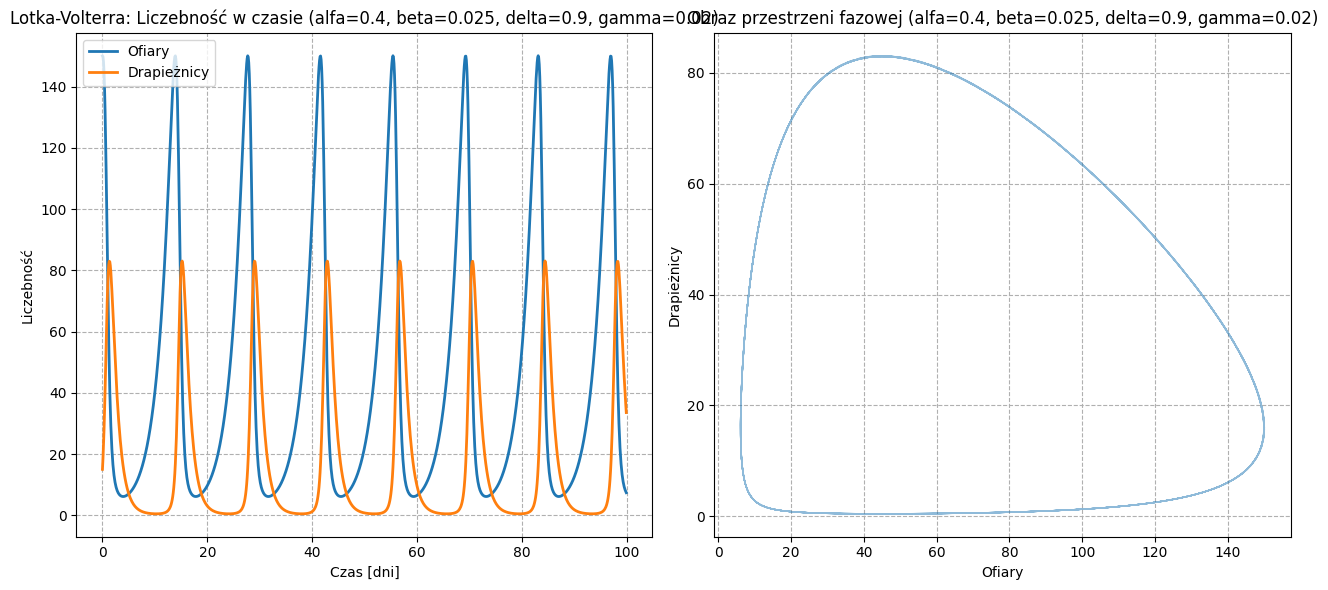

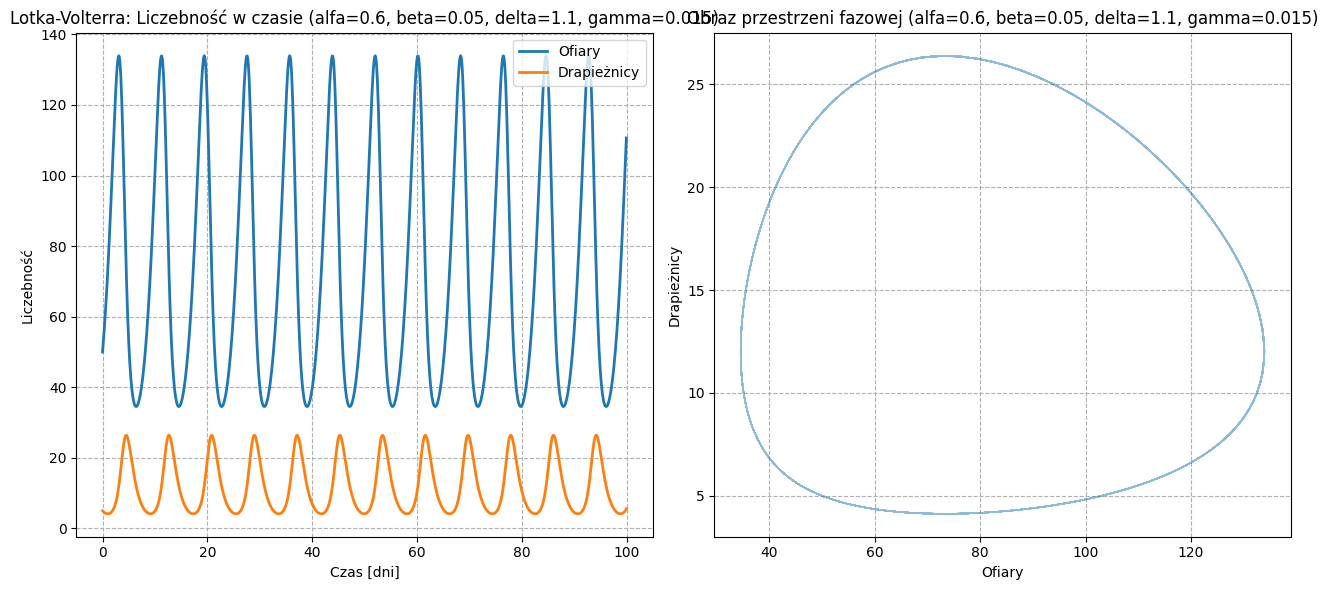

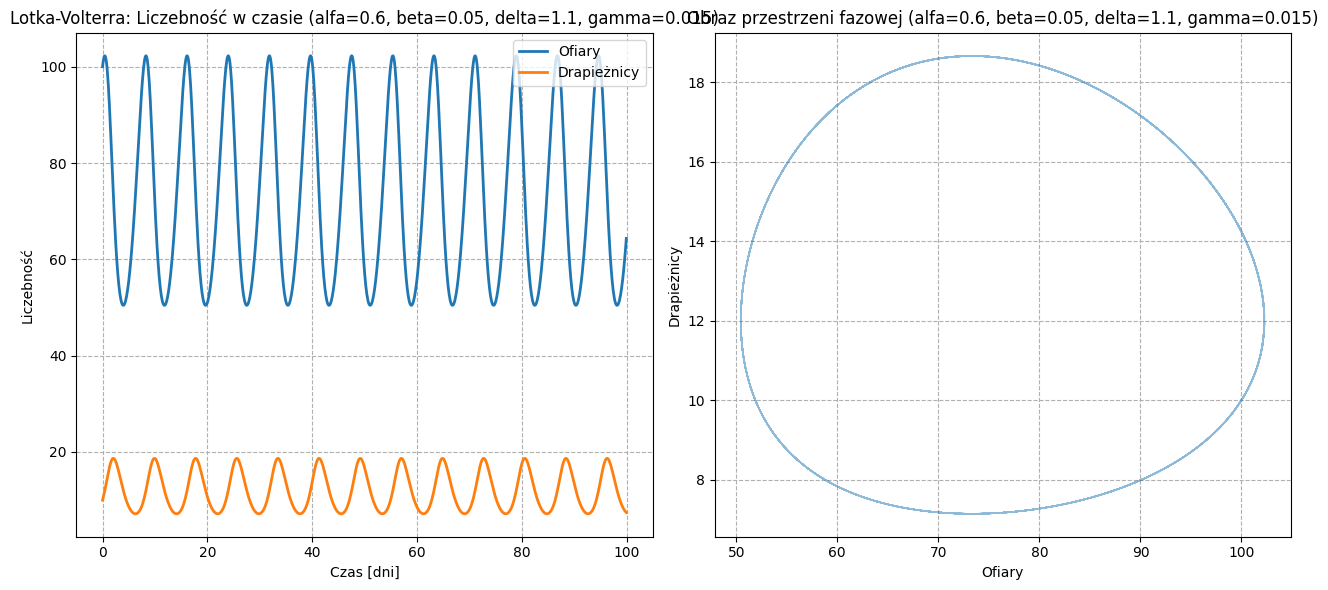

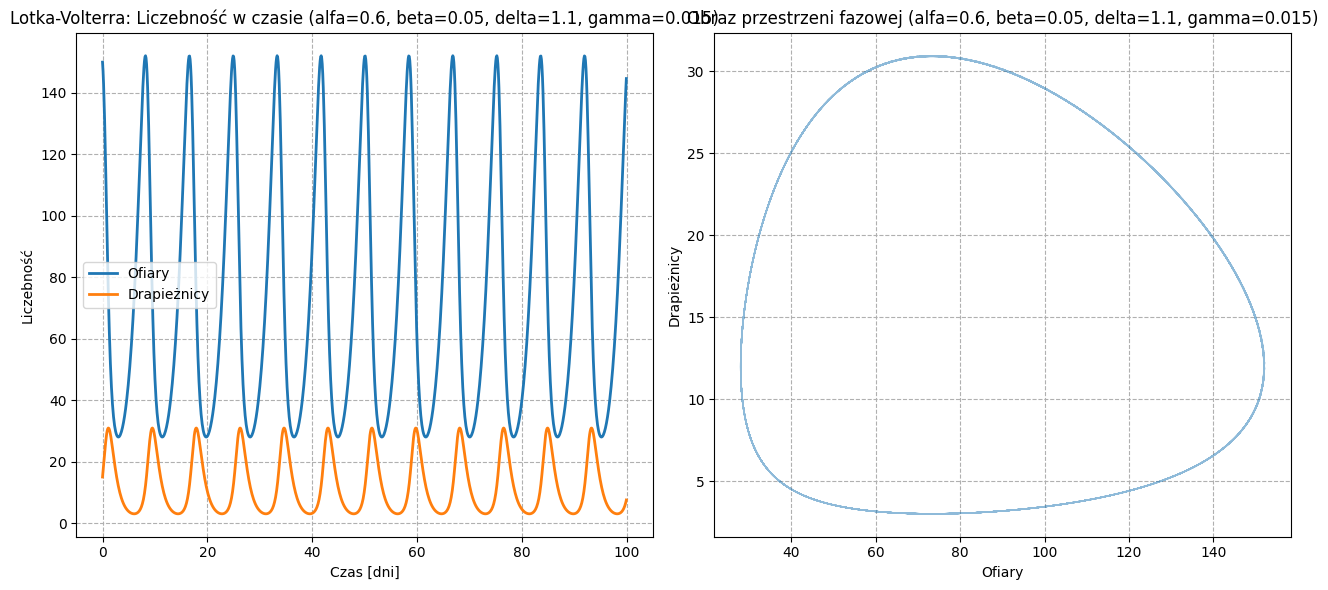

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def lotka_volterra(u, alfa, beta, delta, gamma):
    x, y = u
    dxdt = alfa * x - beta * x * y
    dydt = -delta * y + gamma * x * y
    return np.array([dxdt, dydt])

def rk4_step(f, u, t, dt, *args):
    k1 = f(u, *args)
    k2 = f(u + dt/2 * k1, *args)
    k3 = f(u + dt/2 * k2, *args)
    k4 = f(u + dt * k3, *args)
    return u + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)

def solve_lotka_volterra(f, y0, T, dt, *args):
    num_steps = int(T / dt)
    u = np.zeros((num_steps, len(y0)))
    u[0] = y0
    for i in range(1, num_steps):
        u[i] = rk4_step(f, u[i-1], i*dt, dt, *args)
    return u

def plot_results(T, O, D, scenario_name):
    fig, axs = plt.subplots(1, 2, figsize=(13, 6))

    # Wykres liczebności w czasie
    axs[0].plot(T, O, lw=2, label='Ofiary')
    axs[0].plot(T, D, lw=2, label='Drapieżnicy')
    axs[0].set_title(f'Lotka-Volterra: Liczebność w czasie ({scenario_name})')
    axs[0].set_xlabel('Czas [dni]')
    axs[0].set_ylabel('Liczebność')
    axs[0].grid(True, linestyle='--')
    axs[0].legend(loc='best')

    # Wykres fazowy
    axs[1].plot(O, D, lw=1, alpha=0.5)
    axs[1].set_title(f'Obraz przestrzeni fazowej ({scenario_name})')
    axs[1].set_xlabel('Ofiary')
    axs[1].set_ylabel('Drapieżnicy')
    axs[1].grid(True, linestyle='--')

    plt.tight_layout()
    plt.show()

def main():
    # Parametry czasowe
    dt = 0.1
    max_t = 100
    T = np.arange(0, max_t, dt)

    # Scenariusze testowe
    scenarios = [
        {"alfa": 0.5, "beta": 0.0333, "delta": 1.0, "gamma": 0.01, "initial_conditions": [(50, 5), (100, 10), (150, 15)]},
        {"alfa": 0.4, "beta": 0.025, "delta": 0.9, "gamma": 0.02, "initial_conditions": [(50, 5), (100, 10), (150, 15)]},
        {"alfa": 0.6, "beta": 0.05, "delta": 1.1, "gamma": 0.015, "initial_conditions": [(50, 5), (100, 10), (150, 15)]}
    ]

    for scenario in scenarios:
        alfa = scenario["alfa"]
        beta = scenario["beta"]
        delta = scenario["delta"]
        gamma = scenario["gamma"]
        scenario_name = f"alfa={alfa}, beta={beta}, delta={delta}, gamma={gamma}"

        for y0 in scenario["initial_conditions"]:
            ret = solve_lotka_volterra(lotka_volterra, y0, max_t, dt, alfa, beta, delta, gamma)
            O, D = ret[:, 0], ret[:, 1]
            plot_results(T, O, D, scenario_name)

if __name__ == "__main__":
    main()
